<a href="https://colab.research.google.com/github/seungeunlee00/JUNIA/blob/main/AI/4-ANN/IRIS_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first part of the notebook remains the same :

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
iris = load_iris()

X = iris.data    # The inputs
y = iris.target  # The wanted output

df = pd.DataFrame(X,columns=iris.feature_names)
df['Label']=y
df['Species']=df['Label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df = df.drop(['Label'], axis=1)

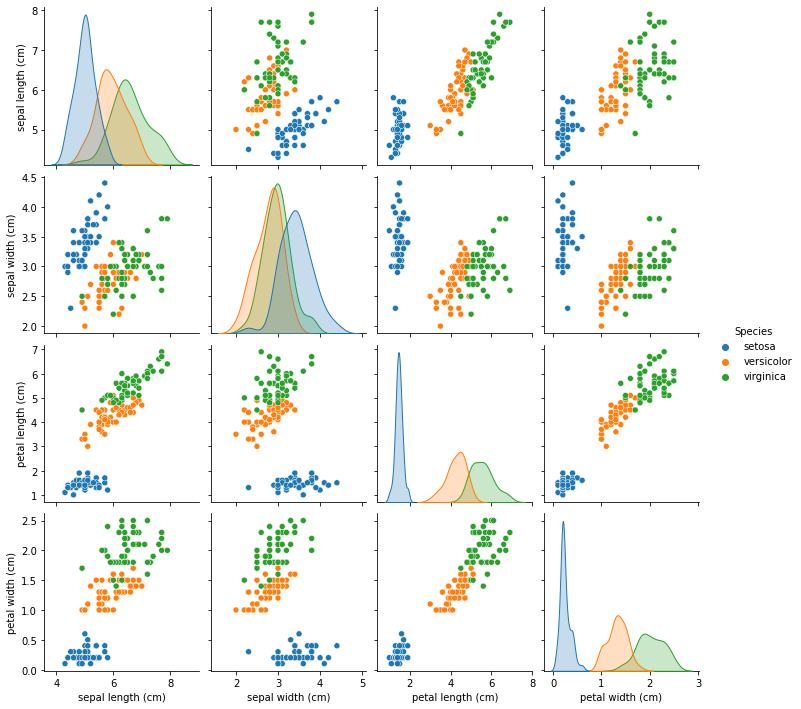

In [ ]:
sns.pairplot(df,  hue='Species')

# Let's import some modules for Neural Networks

You can import Tensorflow as a global module and call directly all its submodules :

In [ ]:
import tensorflow as tf
modelXYZ = tf.keras.models.Sequential()

Or you can import just what you need, and have less complicated code to read :

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils  import to_categorical
from tensorflow.keras.optimizers import Adam

# Create a neural network with no hidden layers 

In [ ]:
# Create the model 
model = Sequential()

# 4 -> number of input attributes
# 3 -> number of classes
model.add(Dense(units = 3, activation = 'softmax', input_shape=[4]))

# Compile the model (check and allocate memory)
adam_optimizer = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=["binary_accuracy"])

# if you do not need to change default optimiser parameters, you can just use :
#model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["binary_accuracy"])

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


Prepare the data : Transform labels into binary class matrix

In [ ]:
# The current state of output data :
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# But to train ou neural network we need to transform each label into binary vector :
# 0 -> [1,0,0]
# 1 -> [0,1,0]
# 2 -> [0,0,1]

Y = to_categorical(y, num_classes=3)
print (Y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

# Train the model

In [ ]:
# now we call "fit" to train the neural network over 200 epochs.
# the object "history" keeps all the intermediary values of loss and binary_accuracy
# we will us it after to display their evolution over epochs

history = model.fit( X, Y, epochs=200, verbose=1)

Epoch 1/200
5/5 [==============================] - 1s 3ms/step - loss: 5.1750 - binary_accuracy: 0.5556
Epoch 2/200
5/5 [==============================] - 0s 5ms/step - loss: 4.2941 - binary_accuracy: 0.5556
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 3.4444 - binary_accuracy: 0.5556
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 2.5820 - binary_accuracy: 0.5556
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 1.8681 - binary_accuracy: 0.5556
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 1.4263 - binary_accuracy: 0.5378
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 1.2797 - binary_accuracy: 0.6356
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 1.2752 - binary_accuracy: 0.6889
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 1.2314 - binary_accuracy: 0.6778
Epoch 10/200
5/5 [==============================] - 0s 3ms/step 

# Display Loss and Accuracy

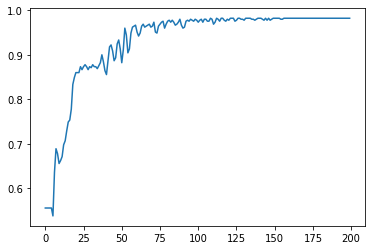

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.show()

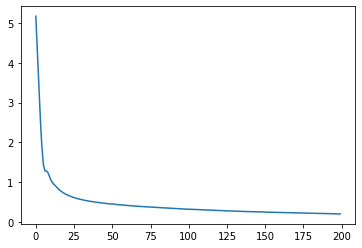

In [ ]:
plt.plot(history.history['loss'])
plt.show()

# What are the weights of the obtained network ?

In [ ]:
for layer in model.layers:
    print( layer.get_weights() )

[array([[ 0.43776742,  0.5453832 , -0.25297502],
       [ 2.0724165 ,  0.09122243, -0.71840066],
       [-1.6149838 ,  0.25194597,  1.2056285 ],
       [-1.8109481 , -0.9688852 ,  2.3616614 ]], dtype=float32), array([ 1.5055379,  1.2293558, -1.5571802], dtype=float32)]


# Guess the family of a new flower ?

Let's use the model to predict the class of this new flower we just measured (6.9, 3.2, 5.7, 2.3) and which is not in the dataset : 

In [ ]:
model.predict([[6.9,3.2,5.7,2.3]])

1/1 [==============================] - 0s 92ms/step


array([[1.21060235e-04, 9.88222286e-02, 9.01056707e-01]], dtype=float32)

Not easy to read, but we see that the maximum value is the last one.

That means that the model associated the flower to class 2 (Virginica).

But can we round this output to understand it quickly :

In [ ]:
np.round (model.predict([[6.9,3.2,5.7,2.3]]))

1/1 [==============================] - 0s 31ms/step


array([[0., 0., 1.]], dtype=float32)

Or better, is it possible to display the label directly instead of binary vectors ?

In [ ]:
np.argmax (model.predict([[6.9,3.2,5.7,2.3]]))

1/1 [==============================] - 0s 29ms/step


2